In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Ideal Filtering (In Freq Domain)

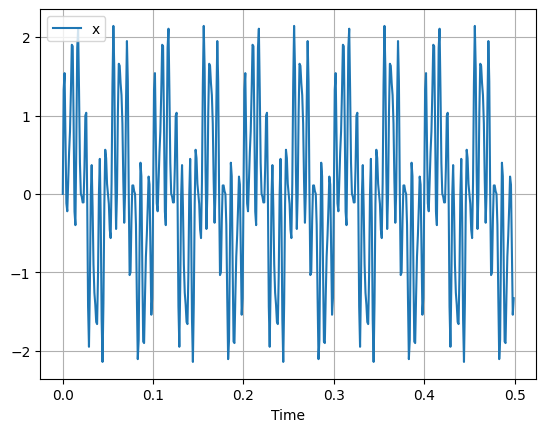

In [3]:
Fs = 1000 # Hz
t = np.arange(0., 0.5, 1/Fs)

f0 = 20
f1 = 130
f2 = 200
x0 = np.sin(2 * np.pi * f0 * t)
x1 = np.sin(2 * np.pi * f1 * t)
x2 = 0.5 * np.sin(2 * np.pi * f2 * t)
x = x0 + x1 + x2

plt.plot(t, x, label='x')
plt.xlabel('Time')
plt.legend(); plt.grid(); plt.show()

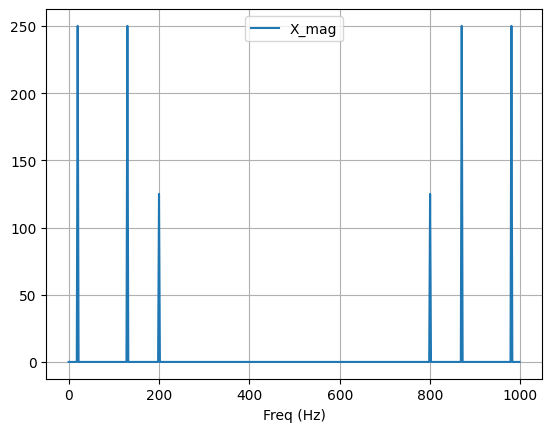

In [28]:
X = np.fft.fft(x)   # freq : 0 to 2*pi
X_mag = np.abs(X)
freq = np.arange(0, len(X)) / len(X) * Fs # OR : np.linspace(0, Fs, len(X))

plt.plot(freq, X_mag, label='X_mag')
plt.xlabel('Freq (Hz)')
plt.legend(); plt.grid(); plt.show()

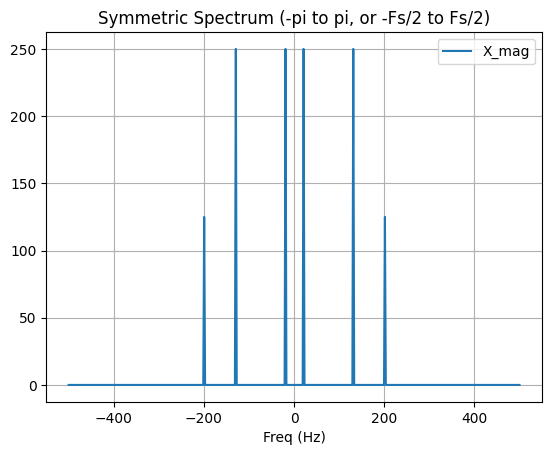

In [4]:
X = np.fft.fftshift(np.fft.fft(x))  # freq : -pi to +pi
X_mag = np.abs(X)

freq = np.linspace(-Fs/2, Fs/2, len(X))

plt.plot(freq, X_mag, label='X_mag')
plt.title('Symmetric Spectrum (-pi to pi, or -Fs/2 to Fs/2)')
plt.xlabel('Freq (Hz)')
plt.legend(); plt.grid(); plt.show()

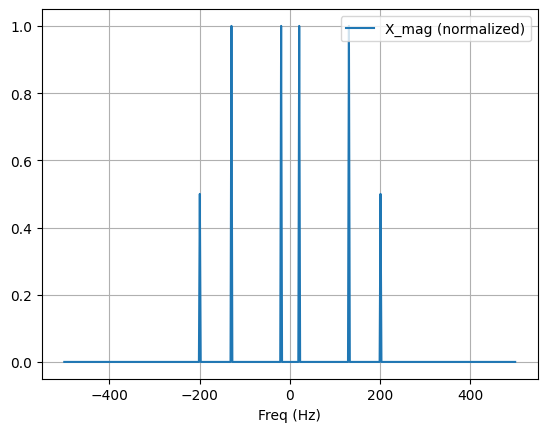

In [81]:
X = np.fft.fftshift(np.fft.fft(x))  # freq : -pi to +pi
X_mag = np.abs(X)
X_mag /= np.max(X_mag)

freq = np.linspace(-Fs/2, Fs/2, len(X))

plt.plot(freq, X_mag, label='X_mag (normalized)')
plt.xlabel('Freq (Hz)')
plt.legend()
plt.grid(); plt.show()

## Ideal Low Pass Filter

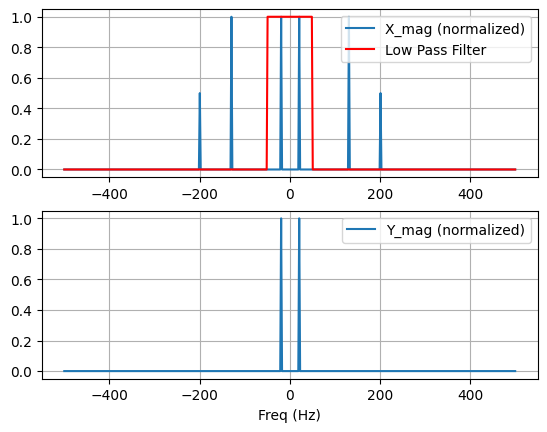

In [5]:
X = np.fft.fftshift(np.fft.fft(x))  # freq : -pi to +pi
X_mag = np.abs(X)

freq = np.linspace(-Fs/2, Fs/2, len(X))

f_cutoff = 50
lpf = (np.abs(freq) <= f_cutoff)    # ideal low pass filter in Frequency domain

# Filter Input Signal in Freq Domain
Y = X * lpf
Y_mag = np.abs(Y)

# Filtered Signal in Time Domain
y = np.fft.ifft(np.fft.ifftshift(Y))
y = np.real(y)

plt.subplot(2, 1, 1); plt.grid()
plt.plot(freq, X_mag / np.max(X_mag), label='X_mag (normalized)')
plt.plot(freq, lpf, 'r', label='Low Pass Filter')
plt.legend()

plt.subplot(2, 1, 2); plt.grid()
plt.plot(freq, Y_mag / np.max(Y_mag), label='Y_mag (normalized)')
plt.legend()
plt.xlabel('Freq (Hz)')

plt.show()

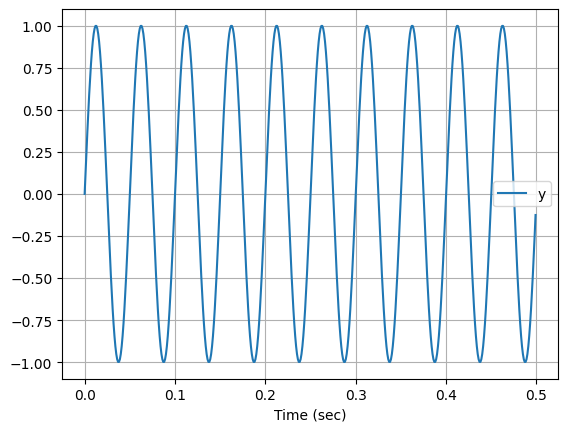

In [99]:
plt.plot(t, y, label='y')
plt.xlabel('Time (sec)')
plt.legend(); plt.grid(); plt.show()

## Ideal Band Pass Filter

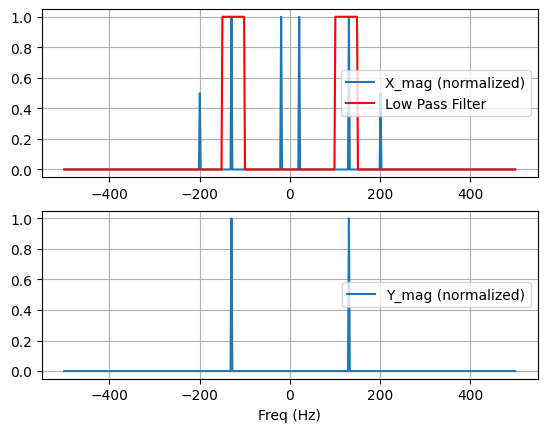

In [8]:
X = np.fft.fftshift(np.fft.fft(x))  # freq : -pi to +pi
X_mag = np.abs(X)

freq = np.linspace(-Fs/2, Fs/2, len(X))

f_cutoff_1 = 100
f_cutoff_2 = 150
# band pass filter in Frequency domain
bpf = (np.abs(freq) >= f_cutoff_1) & (np.abs(freq) <= f_cutoff_2)

# Filter Input Signal in Freq Domain
Y = X * bpf
Y_mag = np.abs(Y)

# Filtered Signal in Time Domain
y = np.fft.ifft(np.fft.ifftshift(Y))
y = np.real(y)

plt.subplot(2, 1, 1); plt.grid()
plt.plot(freq, X_mag / np.max(X_mag), label='X_mag (normalized)')
plt.plot(freq, bpf, 'r', label='Low Pass Filter')
plt.legend()

plt.subplot(2, 1, 2); plt.grid()
plt.plot(freq, Y_mag / np.max(Y_mag), label='Y_mag (normalized)')
plt.legend()
plt.xlabel('Freq (Hz)')

plt.show()

In [40]:
# plt.plot(t, y, label='y')
# plt.xlabel('Time (sec)')
# plt.legend(); plt.grid(); plt.show()

## define freq array with fftfreq (Improvment)

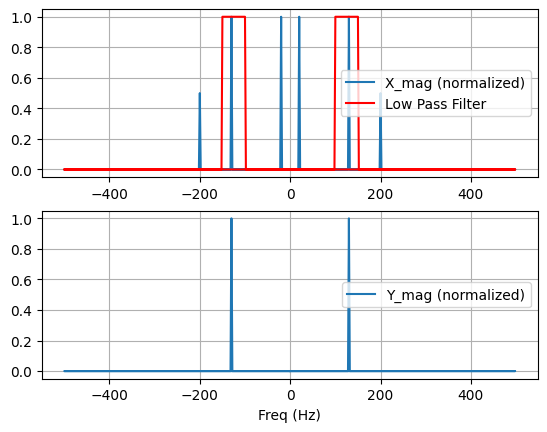

In [18]:
X = np.fft.fft(x)  # freq : 0 to +2*pi
X_mag = np.abs(X)

freq = np.fft.fftfreq(n=len(X), d=1/Fs)

f_cutoff_1 = 100
f_cutoff_2 = 150
# band pass filter in Frequency domain
bpf = (np.abs(freq) >= f_cutoff_1) & (np.abs(freq) <= f_cutoff_2)

# Filter Input Signal in Freq Domain
Y = X * bpf
Y_mag = np.abs(Y)

# Filtered Signal in Time Domain
y = np.fft.ifft(Y)
y = np.real(y)

plt.subplot(2, 1, 1); plt.grid()
plt.plot(freq, X_mag / np.max(X_mag), label='X_mag (normalized)')
plt.plot(freq, bpf, 'r', label='Low Pass Filter')
plt.legend()

plt.subplot(2, 1, 2); plt.grid()
plt.plot(freq, Y_mag / np.max(Y_mag), label='Y_mag (normalized)')
plt.legend()
plt.xlabel('Freq (Hz)')

plt.show()

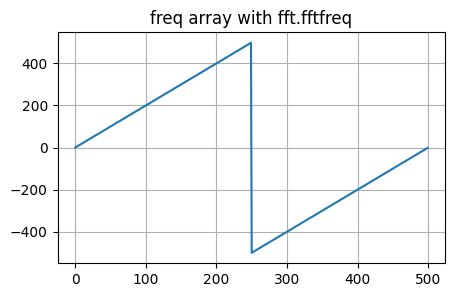

In [19]:
plt.figure(figsize=(5, 3))
plt.plot(freq)
plt.title('freq array with fft.fftfreq')
plt.grid()

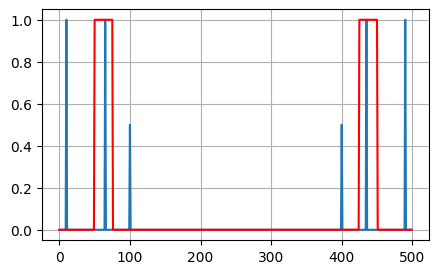

In [22]:
plt.figure(figsize=(5, 3))
plt.plot(X_mag / np.max(X_mag))
plt.plot(bpf, 'r')
plt.grid()

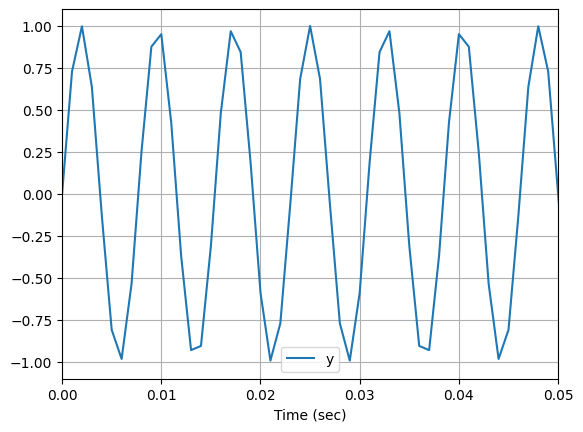

In [16]:
plt.plot(t, y, label='y')
plt.xlim(0, 0.05)
plt.xlabel('Time (sec)')
plt.legend(); plt.grid(); plt.show()